| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github repo for more information: https://github.com/edgi-govdata-archiving/ECHO-COVID19
#### The notebook was collaboratively authored by EDGI following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

# Examining Data from Multiple EPA Programs

This notebook examines data from the EPA's Enforcement and Compliance History Online (ECHO) database (https://echo.epa.gov/). It includes information from EPA's programs covering air quality (the Clean Air Act, or CAA), water quality (the Clean Water Act, or CWA), drinking water (Safe Drinking Water Act, SDWA) and hazardous and other waste processing (the Resource Recovery and Conservation Act, or RCRA). 

ECHO data is available for facility violations as well as inspections and enforcement actions by EPA, state and other agencies. The data made accessible here runs from the present day (the database is refreshed weekly) back to 2001, which is when the EPA believes the data to be most reliable. It is available at the Congressional District level for a selected state, and for counties and zip codes of your choosing. 

## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# **Let's begin!**

Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.

These first two cells give us access to some external Python code we will need.

### 1.  Bring in some code that is stored in a Github project.

In [ ]:
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git
!git clone https://github.com/edgi-govdata-archiving/ECHO-Cross-Program.git
print("Done!")

### 2.  Run a few Python modules.
These will help us process and visualize the different program data sets later.

In [14]:
%run ECHO_modules/DataSet.py
%run ECHO-Cross-Program/utilities.py
%run ECHO_modules/make_data_sets.py
print("Done!")

Done!


### 3.  Run this next cell to create the widget to choose whether you want to view facilities by state, county, congressional district or zip code.
Choose the type of region and proceed to the next cell.

In [2]:
region_type_widget = show_region_type_widget()
state_widget = None

Dropdown(description='Region of interest:', index=2, options=('State', 'Congressional District', 'County', 'Zi…

### 4.  Select your state of interest.  _If you are interested in a zip code analysis, this can be skipped._

In [3]:
state_widget = show_state_widget()

Dropdown(description='State:', options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI'…

### 5.  Run this cell.
It will ask you to specify which Congressional District, county, or zip code you want to look at. If you want to look at an entire state, you should still run this cell, but you won't see any output.

For reference, here is a map of congressional districts: https://www.govtrack.us/congress/members/map

In [4]:
region_widget = None
if ( region_type_widget.value != 'State' ):
    region_widget = show_pick_region_widget( type=region_type_widget.value,
                                           state_widget=state_widget )

IntText(value=98225, description='Zip Code:')

### 6. This cell creates data sets for facilities in the region and presents a dropdown selection.

In [5]:
data_sets = make_data_sets()

data_set_widget = show_data_set_widget( data_sets )

Dropdown(description='Data sets:', options=('RCRA Violations', 'RCRA Inspections', 'RCRA Penalties', 'CAA Insp…

## Graph program-specific data for all the facilities in the region.
### First, choose the program (Air, Water, Drinking Water, and Hazardous Waste) and type of data (Emissions, Violations, Inspections, Enforcement) you want to explore

Running the code below will show you a dropdown you can use to make a selection. **Inspections** or **evaluations** are usually the first phase in the enforcement pipeline, how many (but not all) violations are discovered.  **Violations** happen when a facilty is found to be out of compliance with an environmental law, often by violating the terms of its permit issued under that law.  **Enforcement actions** happen when the regulating agency decides to initiate a "case" against a firm for its violation of an environmental law, either by considering some administrative penalty such as a fine or by taking the violator to court. 

What's available for you to look at here:

**Hazardous and Other Waste**:
- RCRA_EVALUATIONS = Inspections under RCRA
- RCRA_VIOLATIONS = Violations of RCRA rules
- RCRA_ENFORCEMENTS = Enforcement actions taken by state agencies and the EPA

Here's where you can find definitions of terms used in the columns of RCRA data: 
https://echo.epa.gov/tools/data-downloads/rcrainfo-download-summary 

**Air**:
- ICIS-AIR_VIOLATION_HISTORY = CAA violations
- ICIS-AIR_FCES_PCES = Both state and federal CAA compliance evaluations
- ICIS-AIR_FORMAL_ACTIONS = CAA formal enforcement actions

Here's where you can find definitions of terms used in the columns of Clean Air Act data: 
https://echo.epa.gov/tools/data-downloads/icis-air-download-summary

**Air Emissions** (Combined air emissions data for stationary sources from four EPA air programs: National Emissions Inventory (NEI), Greenhouse Gas Reporting Program (GHGRP), Toxic Release Inventory (TRI), and Clean Air Markets (CAMD)):
- Greenhouse Gases via POLL_RPT_COMBINED_EMISSIONS
- Toxic Releases via POLL_RPT_COMBINED_EMISSIONS

Here's where you can find definitions of terms used in the columns of this data: https://echo.epa.gov/tools/data-downloads/air-emissions-download-summary

**Water** (National Pollutant Discharge Elimination System, or NPDES):
- NPDES_QNCR_HISTORY = CWA Quarterly Non-Compliance History
- NPDES_INSPECTIONS = CWA Inspections
- NPDES_FORMAL_ENFORCEMENT_ACTIONS = CWA Enforcements

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/icis-npdes-download-summary

**Drinking Water** (Safe Drinking Water Act, or SDWA):
- SDWA_PUB_WATER_SYSTEMS = Public Water Systems under Safe Drinking Water Act
- SDWA_SITE_VISITS = Safe Drinking Water Site Visits
- SDWA_VIOLATIONS = Safe Drinking Water Violations
- SDWA_SERIOUS_VIOLATORS = Safe Drinking Water Serious Violators
- SDWA_ENFORCEMENTS = Safe Drinking Water Enforcements
- SDWA_RETURN_TO_COMPLIANCE = Safe Drinking Water Return to Compliance

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/sdwa-download-summary

### 7. Once you've chosen the program and data type you want to focus on...
....run the code below, which will access our database and retrieve the information. 
#### This is the main query of the remote database.  It may take some time if there are thousands of facilities in your region that report to the selected program.

In [6]:
%%time
region_selected = None
if ( region_type_widget.value != 'State' ):
    region_selected = region_widget.value
program = data_sets[ data_set_widget.value ]
program_data = program.get_data( region_type=region_type_widget.value, 
                        region_value=region_widget.value if region_widget is not None else None, 
                        state=state_widget.value if state_widget is not None else None )
program_data

873 program records were found
CPU times: user 40.4 ms, sys: 8.82 ms, total: 49.3 ms
Wall time: 1.64 s


,YEARQTR,HLRNC,NUME90Q,NUMCVDT,NUMSVCD,NUMPSCH,FAC_NAME,FAC_STREET,FAC_CITY,FAC_STATE,FAC_ZIP,FAC_COUNTY,FAC_EPA_REGION,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,DFR_URL
NPDES_ID,,,,,,,,,,,,,,,,,,,,
NY0212946,19981,N,0,0,0,0,ASHLAND DISTRIBUTION,SOUTH STREET,RENSSELAER,NY,12144,RENSSELAER,2,42.633917,-73.743306,2.020006e+10,20.0,46.298,3010.21,http://echo.epa.gov/detailed-facility-report?f...
NY0212946,19982,N,0,0,0,0,ASHLAND DISTRIBUTION,SOUTH STREET,RENSSELAER,NY,12144,RENSSELAER,2,42.633917,-73.743306,2.020006e+10,20.0,46.298,3010.21,http://echo.epa.gov/detailed-facility-report?f...
NY0212946,19983,N,4,0,0,0,ASHLAND DISTRIBUTION,SOUTH STREET,RENSSELAER,NY,12144,RENSSELAER,2,42.633917,-73.743306,2.020006e+10,20.0,46.298,3010.21,http://echo.epa.gov/detailed-facility-report?f...
NY0212946,19984,N,0,0,0,0,ASHLAND DISTRIBUTION,SOUTH STREET,RENSSELAER,NY,12144,RENSSELAER,2,42.633917,-73.743306,2.020006e+10,20.0,46.298,3010.21,http://echo.epa.gov/detailed-facility-report?f...
NY0212946,19991,N,3,0,0,0,ASHLAND DISTRIBUTION,SOUTH STREET,RENSSELAER,NY,12144,RENSSELAER,2,42.633917,-73.743306,2.020006e+10,20.0,46.298,3010.21,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NY0028444,20181,C,0,0,0,0,GETTY TERMINAL #58260,49 RIVERSIDE AVE,RENSSELAER,NY,12144,RENSSELAER,2,42.621722,-73.752250,2.020006e+10,20.0,43.061,2411.39,http://echo.epa.gov/detailed-facility-report?f...
NY0028444,20182,C,0,0,0,0,GETTY TERMINAL #58260,49 RIVERSIDE AVE,RENSSELAER,NY,12144,RENSSELAER,2,42.621722,-73.752250,2.020006e+10,20.0,43.061,2411.39,http://echo.epa.gov/detailed-facility-report?f...
NY0028444,20183,C,0,0,0,0,GETTY TERMINAL #58260,49 RIVERSIDE AVE,RENSSELAER,NY,12144,RENSSELAER,2,42.621722,-73.752250,2.020006e+10,20.0,43.061,2411.39,http://echo.epa.gov/detailed-facility-report?f...


## Create an interactive map of all of the facilities in the area that report to EPA
### 8. Once you run this cell, a map should appear. Facilities will be clustered by area. You can zoom in and click on each facility to get its name, the EPA programs that monitor it, and a link to a more detailed report.

The EPA program acronyms are:
- CAA = Clean Air Act
- CWA = Clean Water Act
- SDWIS = Safe Drinking Water Information System
- RCRA = Resource Conservation and Recovery Act
- TRI = Toxics Release Inventory
- GHG = Greenhouse Gas Reporting Program

_Note:_ You might find that there are some facilities located outside of the region you selected. That's probably beacuse of an issue in how EPA generates spatial information for facilities.

In [7]:
df_to_map = program_data.loc[~program_data.index.duplicated(keep='first')]
    
map_of_facilities = mapper(df_to_map)
map_of_facilities

## In this section you may save the data to your computer.
### 9.  In this cell you may save the program data for your region to your computer.
This next cell allows you to save the data from the particular program for your chosen region to your computer.

#### Accessing your files
Click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [8]:
if ( len( program_data ) > 0 ):
    state_name = None
    if ( state_widget is not None ):
        state_name = state_widget.value
    write_dataset( df=program_data, base=program.name, type=region_type_widget.value, 
           state=state_name, region=region_selected )
else:
    print( "There is no data for this program and region." )

Wrote CWA Violations-Zip Code-12144.csv


### 10. Let's make a chart out of this!

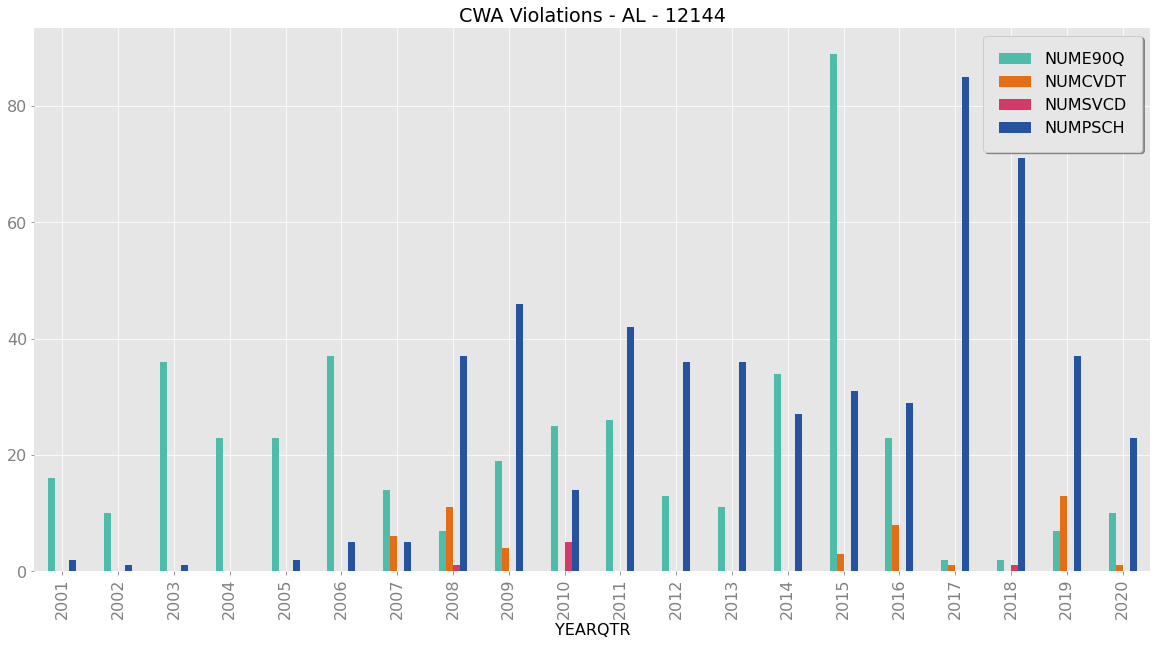

In [15]:
state = None
if ( state_widget ):
    state = state_widget.value
    
show_chart( program=program, region=region_selected, data=program_data, state=state )

#### If you'd like to look at another dimension of ECHO data for this region...
....return to the dropdown menu above and choose a different program/data type, run the database access code, and then chart and map it!

---

## Choose a specific facility
### 11. In the next few blocks of code, you can focus in on just one facility in the region.
Run the below cell, then choose a facility from the dropdown that appears.

In [ ]:
fac_series = program_data["FAC_NAME"]
fac_widget = show_fac_widget( fac_series )

### 12. Let's see the data for this facility

In [ ]:
fac_pgm_data = program_data[ program_data["FAC_NAME"] == fac_widget.value ]

if ( fac_pgm_data is None or len( fac_pgm_data ) == 0 ):
    print( "There is no {} data for {} ".format( fac_pgm_widget.value, fac_widget.value ))
else:
    print( fac_pgm_data )

### 13. This cell saves this facility's data for this program to your computer.
The next cell exports this data to your computer.  You can return to the dropdown to export additional data files.

#### Accessing your files
Click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [ ]:
# fac_pgm_data = add_fac_to_pgm_data( fac_pgm_data, fac_data )
if ( len( fac_pgm_data ) > 0 ):
    state_name = None
    if ( state_widget is not None ):
        state_name = state_widget.value
    write_file( df=fac_pgm_data, base=program.name+'-'+fac_widget.value, 
               type=region_type_widget.value, state=state_name, region=region_selected )
else:
    print( "There is no data for this program and region." )

### If you'd like to look at another dimension of ECHO data for this facility...
....return to the dropdown menu above and choose a different program/data type, then chart it!